# US Housing Starts m/m

Housing Starts m/m reflect changes in the number of new residential construction projects, which started in the reported month, compared to the previous month.

Data for the indicator are obtained from a survey of developers and regulatory authorities. The sample size covers about 95% of all residential construction projects in the country. The data are adjusted for weather and season variations. The indicator is published in the second decade of each month, as part of the general national construction report. The report also includes construction permits and completed projects.

The volume of new housing starts is rarely interpreted in absolute terms: construction is highly dependent on weather conditions, geographic location in the region, and time of the year. That is why analysts normally measure the indicator change for several months. During the indicator interpretation, economists pay attention to the following reference points.

An increase in demand for new homes points to the growth of the population welfare.
An increase in new housing constructions leads to an increase of employment in the construction industry.
An increase in demand for new homes may lead to an increased demand for other products needed to new home buyers, such as new furniture, appliances, etc. This may spur consumer activity and affect price indices.
The indicator growth may lead to an increase in the real estate market.
Taking into account the above point, higher readings of housing starts may have a positive impact on the US dollar quotes.
                        
source:
- https://www.mql5.com/en/economic-calendar/united-states/housing-starts-mm

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample the data</a></span></li></ul></li><li><span><a href="#Extract-right-columns" data-toc-modified-id="Extract-right-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract right columns</a></span></li><li><span><a href="#Insert-Rata-Die-Column" data-toc-modified-id="Insert-Rata-Die-Column-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Insert Rata Die Column</a></span><ul class="toc-item"><li><span><a href="#Insert-Future-Date" data-toc-modified-id="Insert-Future-Date-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Insert Future Date</a></span></li><li><span><a href="#Update-the-Rata-Die-Column" data-toc-modified-id="Update-the-Rata-Die-Column-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Update the Rata Die Column</a></span></li><li><span><a href="#Fill-in-Empty-Dates-and-Sort" data-toc-modified-id="Fill-in-Empty-Dates-and-Sort-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fill in Empty Dates and Sort</a></span></li><li><span><a href="#Fill:-Draw-Plots" data-toc-modified-id="Fill:-Draw-Plots-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Fill: Draw Plots</a></span></li></ul></li><li><span><a href="#Quantize-the-values" data-toc-modified-id="Quantize-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quantize the values</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Averages</a></span><ul class="toc-item"><li><span><a href="#Averages:-Draw-Plots" data-toc-modified-id="Averages:-Draw-Plots-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Averages: Draw Plots</a></span></li><li><span><a href="#Insert-averages-to-DataFrame" data-toc-modified-id="Insert-averages-to-DataFrame-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Insert averages to DataFrame</a></span></li></ul></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save DataFrame to CSV file</a></span><ul class="toc-item"><li><span><a href="#Save:-Describe-before-saving" data-toc-modified-id="Save:-Describe-before-saving-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Save: Describe before saving</a></span></li><li><span><a href="#Write-as-CSV-file" data-toc-modified-id="Write-as-CSV-file-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Write as CSV file</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
dataset_file_name = "united-states.housing-starts-mm.csv"
path_data_original = "../Data/original/"
date_original_format = "yyyy.mm.dd"
column_to_keep = 2
last_position_change = "2020-09-30"

include("../Julia/functions.jl") 
println()

## Read Data

In [2]:
## show available datasets
#data = available_datasets() # uncomment to see all available datasets

# Read DataFrame from the CSV file.
df = fetch_dataset(dataset_file_name, date_original_format , path_data_original )

println()

Fetched and sorted by date ../Data/original/united-states.housing-starts-mm.csv, record count 59



### Sample the data

In [3]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Date,,2016-01-12,,2020-11-18,59,,Date
2,ActualValue,0.261017,-30.2,-0.3,25.5,,,Float64
3,ForecastValue,6.60698,-30.7,1.1,245.5,,16,"Union{Missing, Float64}"
4,PreviousValue,0.406897,-26.4,-0.35,27.4,,1,"Union{Missing, Float64}"


## Extract right columns

In [4]:
using DataFrames
df = DataFrame( 
                  Date      = df[:,1]               # 2 
                , Original  = df[:,column_to_keep]  # 3 
                , Quantized = df[:,column_to_keep]  # 4 
               )

columns = preview_data(df)
println()

6×3 DataFrame
│ Row │ Date       │ Original │ Quantized │
│     │ Date       │ Float64  │ Float64   │
├─────┼────────────┼──────────┼───────────┤
│ 1   │ 2016-01-12 │ -2.5     │ -2.5      │
│ 2   │ 2016-11-17 │ 25.5     │ 25.5      │
│ 3   │ 2017-09-19 │ -0.8     │ -0.8      │
│ 4   │ 2018-07-18 │ -12.3    │ -12.3     │
│ 5   │ 2019-05-16 │ 5.7      │ 5.7       │
│ 6   │ 2020-03-18 │ -1.5     │ -1.5      │
 Dataset dimentions: (59, 3)

 variable columns:
1 Date
2 Original
3 Quantized



## Insert Rata Die Column

In [5]:
## Insert the Rata Die Column
record_count = size(df)[1]
col_ind = 1
insertcols!(df, col_ind, :Rata_Die => zeros(Int64, record_count); makeunique = true )
println()

### Insert Future Date

In [6]:
using Dates
columns = names(df)
println(columns)

future_rata_die = Dates.datetime2rata( today() ) + 31 # days from now
future_date = Dates.rata2datetime( future_rata_die)
push!(df, [ future_rata_die future_date 0 0 ])

# sort by Day (Rata Die)
df = sort(df, [:Rata_Die]);

last_row = size(df)[1]
df[last_row,:]

["Rata_Die", "Date", "Original", "Quantized"]


,Rata_Die,Date,Original,Quantized
,Int64,Date,Float64,Float64
60,737794,2021-01-04,0.0,0.0


### Update the Rata Die Column

In [7]:
update_rata_die!(df, 1, 2)

#first(df, 6)
println("Inserted Rata Die")


Inserted Rata Die


### Fill in Empty Dates and Sort

In [8]:
populate_missing_dates!(df)

df = sort(df, [:Rata_Die]);

count = size(df)[1]
first(df, 8)

last_row = size(df)[1]
df[last_row,:]

,Rata_Die,Date,Original,Quantized
,Int64,Date,Float64,Float64
1820,737794,2021-01-04,0.0,0.0


### Fill: Draw Plots
- if the indicator is updated only preiodically (bi-weekly, monthly, quarterly) the the graph will appear blocky

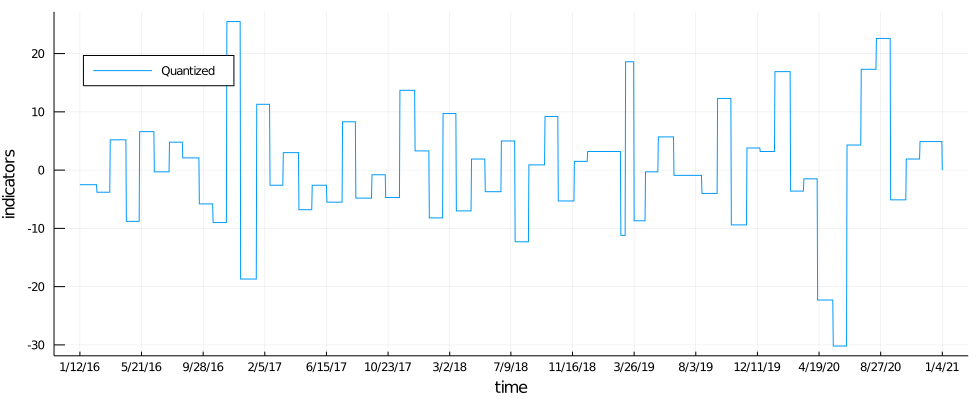

In [9]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [ df[rows,:Quantized]    ], # y-axis
    label    = [ "Quantized"  ""],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

## Quantize the values

- Quantization is a process of noramalizing the data
- I have decided to normalize the data for Int8 as I might try use Google Coral NPU
- minimum = -128.0
- maximum = 127.0

In [10]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df,4)

using Statistics
describe(df)

Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.36884e5,735975,7.36884e5,737794,,,Int64
2,Date,,2016-01-12,,2021-01-04,1820,,Date
3,Original,0.321813,-30.2,-0.3,25.5,,,Float64
4,Quantized,11.7093,-128.0,9.0,127.0,,,Float64


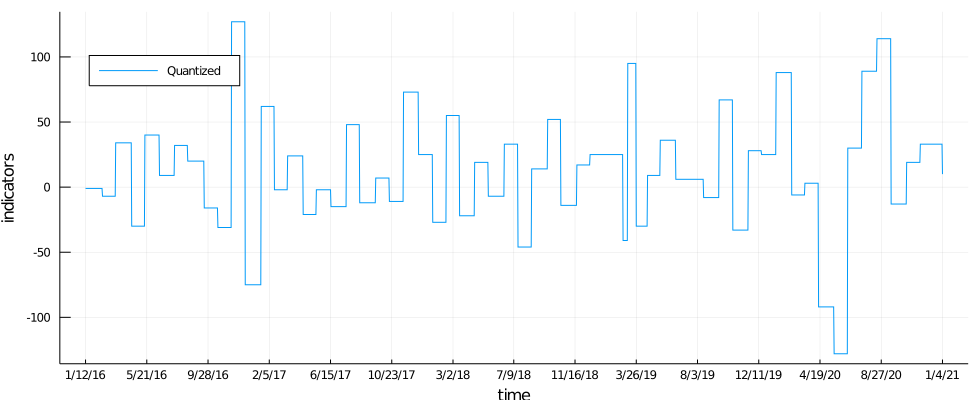

In [11]:
using Plots

count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,:Quantized]    ], # y-axis
    label    = [  "Quantized" ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

## Averages

In [12]:
averages005 = calculate_average(df, 5,   :Quantized )
averages030 = calculate_average(df, 30,  :Quantized )
averages060 = calculate_average(df, 60,  :Quantized )
averages090 = calculate_average(df, 90,  :Quantized )
averages180 = calculate_average(df, 180, :Quantized )
averages365 = calculate_average(df, 365, :Quantized )
println()

### Averages: Draw Plots

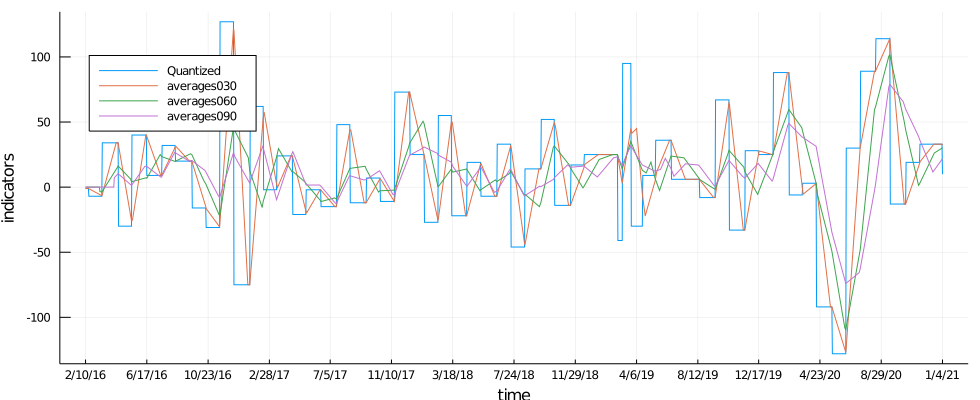

In [13]:
using Plots

columns = names(df)
count = size(df)[1]
days_back = 30
rows = days_back:count # count-days_back:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [ df[rows,:Quantized] averages030[rows] averages060[rows] averages090[rows]  ], # y-axis
    label    = [ "Quantized" "averages030" "averages060" "averages090" ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

### Insert averages to DataFrame

- if the frequency of data is e.g. 30 days, averages below 30 days do not add value

In [14]:
insertcols!(df,  5,  :Avg030   => averages030  , makeunique=true)
insertcols!(df,  6,  :Avg060   => averages060  , makeunique=true)
insertcols!(df,  7,  :Avg090   => averages090  , makeunique=true)
insertcols!(df,  8,  :Avg180   => averages180  , makeunique=true)
insertcols!(df,  9,  :Avg365   => averages365  , makeunique=true)

using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.36884e5,735975,7.36884e5,737794,,,Int64
2,Date,,2016-01-12,,2021-01-04,1820,,Date
3,Original,0.321813,-30.2,-0.3,25.5,,,Float64
4,Quantized,11.7093,-128.0,9.0,127.0,,,Float64
5,Avg030,11.4666,-126.8,10.8,121.73,,,Float64
6,Avg060,11.2269,-109.4,11.165,101.5,,,Float64
7,Avg090,10.9995,-74.04,11.68,78.98,,,Float64
8,Avg180,9.87997,-17.92,10.31,45.62,,,Float64
9,Avg365,8.77227,-3.9,10.015,21.17,,,Float64


[back to top](#Table-of-Contents)
<hr/>

## Save DataFrame to CSV file

### Save: Describe before saving

In [15]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,7.36884e5,735975,7.36884e5,737794,,,Int64
2,Date,,2016-01-12,,2021-01-04,1820,,Date
3,Original,0.321813,-30.2,-0.3,25.5,,,Float64
4,Quantized,11.7093,-128.0,9.0,127.0,,,Float64
5,Avg030,11.4666,-126.8,10.8,121.73,,,Float64
6,Avg060,11.2269,-109.4,11.165,101.5,,,Float64
7,Avg090,10.9995,-74.04,11.68,78.98,,,Float64
8,Avg180,9.87997,-17.92,10.31,45.62,,,Float64
9,Avg365,8.77227,-3.9,10.015,21.17,,,Float64


### Write as CSV file

In [16]:
save_dataset(df, dataset_file_name, "../Data/processed/" );
println("US_Housing_Starts_mm finished and saved to ", dataset_file_name)

US_Housing_Starts_mm finished and saved to united-states.housing-starts-mm.csv
